In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

     |████████████████████████████████| 636 kB 2.8 MB/s eta 0:00:01


In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Authentication
consumerKey = 'OBCdujzxUtId88sn8oWOsa26Q'
consumerSecret = '6bhtj75pPi3K2GZO49kWOtkXgr4NmpRjQ9FLHRDeBjqqebiBn0'
accessToken = '1539950584299753474-SmgbqjDLAas8KdBRFfUoANiDbQwSeU'
accessTokenSecret = 'Z2cMIfzLterjxn7BKx3T1srWw6uytNV9kshtt61ZESr5N'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [23]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)
keyword = input("Enter a keyword or search term: ")
noOfTweet = int(input ("How many tweets: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Enter a keyword or search term: Sephora
How many tweets: 100


In [24]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  100
positive number:  43
negative number:  16
neutral number:  41


In [25]:
tweet_list

,0
0,RT @sanjanaravi_: Super fun time at @rarebeaut...
1,If I had a gf I would buy her the whole Sephor...
2,RT @sanjanaravi_: Super fun time at @rarebeaut...
3,Jamás pondrán un Sephora en cumbres
4,RT @SelenaFanClub: Sel looking absolutely stun...
...,...
95,RT @rarebeauty: One-swipe color meets all-day ...
96,RT @SelenaFanClub: Sel looking absolutely stun...
97,anyone have tinted moisturizer and/or bb/cc cr...
98,Estamos chocados com as ofertas de até 60% OFF...


In [26]:
tweet_list.drop_duplicates(inplace = True)

In [27]:
#Calculating Negative, Positive, Neutral and Compound values
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,sentiment,neg,neu,pos,compound
0,RT @sanjanaravi_: Super fun time at @rarebeaut...,RT @sanjanaravi_: Super fun time at @rarebeaut...,positive,NaN,NaN,NaN,NaN
1,If I had a gf I would buy her the whole Sephor...,If I had a gf I would buy her the whole Sephor...,neutral,0.0,1.0,0.0,0.0
3,Jamás pondrán un Sephora en cumbres,Jamás pondrán un Sephora en cumbres,neutral,0.0,1.0,0.0,0.0
4,RT @SelenaFanClub: Sel looking absolutely stun...,RT @SelenaFanClub: Sel looking absolutely stun...,positive,NaN,NaN,NaN,NaN
5,Canned food for Sephora : https://t.co/3xVzRKFrU7,Canned food for Sephora : https://t.co/3xVzRKFrU7,neutral,0.0,1.0,0.0,0.0
7,dites à Sephora de me sponsoriser pardon,dites à Sephora de me sponsoriser pardon,positive,NaN,NaN,NaN,NaN
8,Last day of Sephora month…let’s try this shit ...,Last day of Sephora month…let’s try this shit ...,negative,NaN,NaN,NaN,NaN
9,What if Quentin Tarantino wants to start a fam...,What if Quentin Tarantino wants to start a fam...,neutral,0.0,1.0,0.0,0.0
10,Sephora mld elle es enceinte hmm c’est qui le ...,Sephora mld elle es enceinte hmm c’est qui le ...,neutral,0.0,1.0,0.0,0.0
12,RT @onlynessahere: Sephora mld elle a repris l...,RT @onlynessahere: Sephora mld elle a repris l...,neutral,0.0,1.0,0.0,0.0


In [28]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [29]:
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,41,51.25
positive,23,28.75
negative,16,20.00


next steps: clean tweets / set language to English only |
run code through all brands to show sentiment percentage for each*

In [30]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


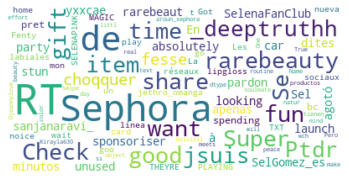

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
positive = tw_list[tw_list['sentiment']=='positive']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(positive['text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

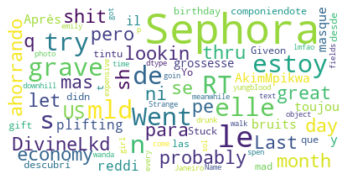

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
positive = tw_list[tw_list['sentiment']=='negative']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(positive['text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()